In [199]:
import pandas as pd
import datetime
import re
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [200]:
data = pd.read_csv('./input/Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv')
data.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [201]:
data.shape

(4967, 17)

In [202]:
print(data.columns)

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'AC Type',
       'Registration', 'cn/ln', 'Aboard', 'Aboard Passangers', 'Aboard Crew',
       'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground',
       'Summary'],
      dtype='object')


In [203]:
# Selecting columns that are relevant to  ""

data1 = data[["Date","Time", "Location", "Operator", "Fatalities", "Summary"]]


data1.head()

,Date,Time,Location,Operator,Fatalities,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,1.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,1.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,5.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,1.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,14.0,The airship flew into a thunderstorm and encou...


In [204]:
# Checking for null columns 

null_cols = data1.isnull().sum()
null_cols

Date             0
Time          1510
Location         4
Operator        10
Fatalities       8
Summary         64
dtype: int64

In [205]:
# Seeing that around 30% of the Time data is missing, decided to do without the time that the accident occured, and hence this column was dropped

data2 = data1.drop("Time", axis=1)

data2.head()

,Date,Location,Operator,Fatalities,Summary
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,1.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,"Juvisy-sur-Orge, France",NaN,1.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,"Atlantic City, New Jersey",Military - U.S. Navy,5.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,"Victoria, British Columbia, Canada",Private,1.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,Over the North Sea,Military - German Navy,14.0,The airship flew into a thunderstorm and encou...


In [206]:
# Dropping rows containing null as they are an insignificant number

data3 = data2.dropna()

data3

,Date,Location,Operator,Fatalities,Summary
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,1.0,"During a demonstration flight, a U.S. Army fly..."
2,07/12/1912,"Atlantic City, New Jersey",Military - U.S. Navy,5.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,"Victoria, British Columbia, Canada",Private,1.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,Over the North Sea,Military - German Navy,14.0,The airship flew into a thunderstorm and encou...
5,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,30.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...
4962,04/16/2019,"Puerto Montt, Chile",Archipelagos Service Aereos,6.0,"While the aircraft was in the initial climb, p..."
4963,05/05/2019,"Near Monclava, Mexico",TVPX Aircraft Solutions,13.0,The aircraft crashed while en route on a retur...
4964,05/05/2019,"Moscow, Russia",Aeroflot Russian International Airlines,41.0,Forty-five minutes after taking off from Mosco...
4965,06/03/2019,"Near Lipo, India",Military - Indian Air Force,13.0,Crashed about 34km WNW of Mechuka.


In [207]:
null_cols = data3.isnull().sum()
null_cols

Date          0
Location      0
Operator      0
Fatalities    0
Summary       0
dtype: int64

In [208]:
# Change floats to integers

data3['Fatalities'] = data3["Fatalities"].astype(np.int64)
data3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Location,Operator,Fatalities,Summary
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,1,"During a demonstration flight, a U.S. Army fly..."
2,07/12/1912,"Atlantic City, New Jersey",Military - U.S. Navy,5,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,"Victoria, British Columbia, Canada",Private,1,The first fatal airplane accident in Canada oc...
4,09/09/1913,Over the North Sea,Military - German Navy,14,The airship flew into a thunderstorm and encou...
5,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,30,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...
4962,04/16/2019,"Puerto Montt, Chile",Archipelagos Service Aereos,6,"While the aircraft was in the initial climb, p..."
4963,05/05/2019,"Near Monclava, Mexico",TVPX Aircraft Solutions,13,The aircraft crashed while en route on a retur...
4964,05/05/2019,"Moscow, Russia",Aeroflot Russian International Airlines,41,Forty-five minutes after taking off from Mosco...
4965,06/03/2019,"Near Lipo, India",Military - Indian Air Force,13,Crashed about 34km WNW of Mechuka.


In [209]:
print(set(data3['Fatalities']))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 583, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 137, 140, 141, 143, 144, 145, 146, 148, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 166, 167, 168, 169, 170, 171, 174, 176, 178, 180, 181, 183, 187, 188, 189, 191, 196, 200, 213, 217, 223, 224, 225, 228, 229, 230, 234, 239, 256, 257, 259, 260, 261, 264, 269, 271, 275, 520, 290, 298, 301, 329, 346, 349, 71}


In [210]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4886 entries, 0 to 4966
Data columns (total 5 columns):
Date          4886 non-null object
Location      4886 non-null object
Operator      4886 non-null object
Fatalities    4886 non-null int64
Summary       4886 non-null object
dtypes: int64(1), object(4)
memory usage: 229.0+ KB


In [211]:
#print(set(data3['Date']))

In [223]:
data3['Date'] = pd.to_datetime(data3['Date'])
data3['Year'] = data3['Date'].dt.year
#data3
# Only take into account the crashes occured in the last 50 years
data3 = data3[data3['Year'] > 1969].reset_index()
data3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,Date,Location,Operator,Fatalities,Summary,Year
0,2435,1970-01-05,"Stockholm, Sweden",Spantax,5,The plane developed trouble in the No. 4 engin...,1970
1,2436,1970-01-12,Near Villia Greece,Military - Royal Hellenic Air Force,23,"The aircraft, carrying paratroopers, crashed i...",1970
2,2437,1970-01-13,"Faleolo, Western Samoa",Polynesian Airlines,32,Crashed into a lagoon 400 yards past the end o...,1970
3,2438,1970-01-14,"Mt. Pumacona, Peru",Faucett,28,"Flew into a 10,500 ft. mountain. The mental st...",1970
4,2439,1970-01-25,"Near Delhi, India",Royal Nepal Airlines,1,The aircraft crashed short of the runway after...,1970
...,...,...,...,...,...,...,...
2508,4962,2019-04-16,"Puerto Montt, Chile",Archipelagos Service Aereos,6,"While the aircraft was in the initial climb, p...",2019
2509,4963,2019-05-05,"Near Monclava, Mexico",TVPX Aircraft Solutions,13,The aircraft crashed while en route on a retur...,2019
2510,4964,2019-05-05,"Moscow, Russia",Aeroflot Russian International Airlines,41,Forty-five minutes after taking off from Mosco...,2019
2511,4965,2019-06-03,"Near Lipo, India",Military - Indian Air Force,13,Crashed about 34km WNW of Mechuka.,2019


In [213]:
crashes_year = data3.loc[:, ["Year","Date"]].groupby(['Year']).count()
crashes_year

,Date
Year,
1970,73
1971,58
1972,77
1973,64
1974,58
1975,50
1976,57
1977,60
1978,49


Text(0,0.5,'Number of Crashes')

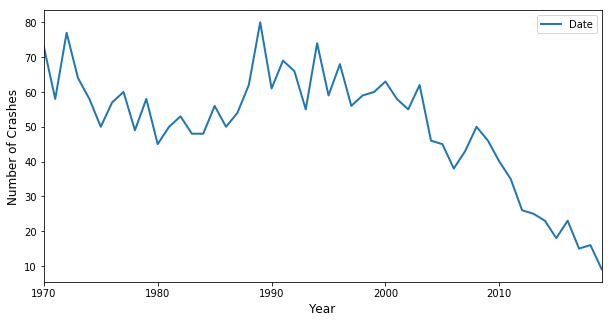

In [214]:
plot1 = crashes_year.plot(lw=2, figsize=(10,5))
plot1.set_xlabel("Year", fontsize=12)
plot1.set_ylabel("Number of Crashes", fontsize=12)


In [217]:


crashed_operator = data3.loc[:, ["Operator","Date"]].groupby(['Operator']).count()
crashed_operator = crashed_operator.sort_values(by="Date", ascending=False).head(20)

crashed_operator

,Date
Operator,
Aeroflot,142
Military - U.S. Air Force,54
Private,21
Merpati Nusantara Airlines,18
Military - U.S. Army,15
Philippine Air Lines,14
Indian Airlines,13
Military - Afghan Republican Air Force,13
Military - Russian Air Force,13


Text(0,0.5,'Number of Crashes')

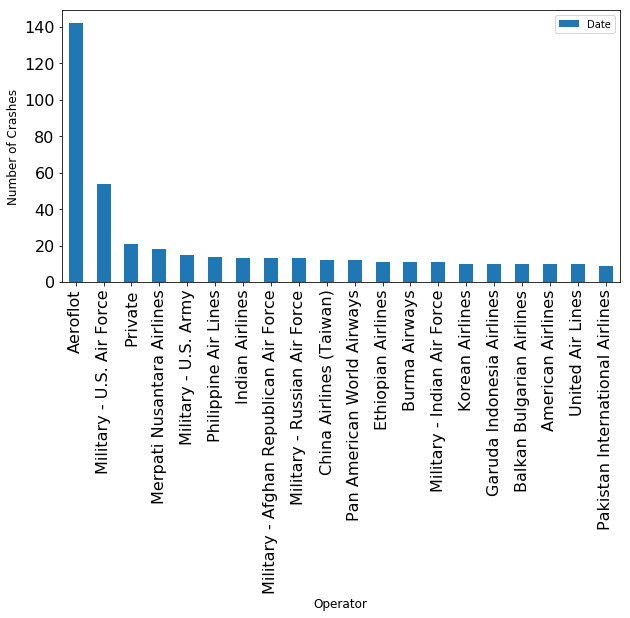

In [218]:
plot2 = crashed_operator.plot.bar(fontsize = 16, figsize=(10,5))
plot2.set_xlabel("Operator", fontsize=12)
plot2.set_ylabel("Number of Crashes", fontsize=12)